<a href="https://colab.research.google.com/github/yoheikikuta/TensorFlow2-check/blob/master/colab/robust_physical_perturbations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q keras==1.2.0

     |████████████████████████████████| 174kB 1.4MB/s 
ERROR: fancyimpute 0.4.3 has requirement keras>=2.0.0, but you'll have keras 1.2.0 which is incompatible.
ERROR: kapre 0.1.3.1 has requirement keras>=2.0.0, but you'll have keras 1.2.0 which is incompatible.


In [7]:
import tensorflow as tf

tf.__version__

'1.15.0'

In [2]:
!git clone https://github.com/evtimovi/robust_physical_perturbations.git

Cloning into 'robust_physical_perturbations'...
remote: Enumerating objects: 574, done.
remote: Total 574 (delta 0), reused 0 (delta 0), pack-reused 574
Receiving objects: 100% (574/574), 85.07 MiB | 4.83 MiB/s, done.
Resolving deltas: 100% (37/37), done.


In [3]:
%cd robust_physical_perturbations/lisa-cnn-attack

/content/robust_physical_perturbations/lisa-cnn-attack


In [4]:
!ls

apply_noise_to_bigger_image.py	misc		     README.md
cleverhans			models		     run_attack_many.sh
gennoise_many_images.py		npstriplets.txt      run_noise_to_bigimage.sh
manyclassify.py			optimization_output  utils.py
masks				Pipfile		     victim-set


## Check script

In [0]:
!mkdir -p optimization_output/octagon/model/octagon
!mkdir -p optimization_output/octagon/noisy_images

In [16]:
SIGN_PREFIX="octagon"
SIGN_SETPOINT=0.37
SIGN_MASK="octagon.png"
SIGN_TARGET=12

!python gennoise_many_images.py  \
    --tf_seed 12345 \
    --inverse_mask False \
    --initial_value_for_noise="" \
    --optimization_rate 0.1 \
    --adam_beta1 0.9 \
    --adam_beta2 0.999 \
    --adam_epsilon 1e-08 \
    --model_path="./models/all_r_ivan.ckpt" \
    --attack_epochs 300 \
    --save_frequency 10 \
    --attack_srcdir="victim-set" \
    --attack_mask="./masks/octagon.png" \
    --checkpoint "octagon"\
    --target_class 12 \
    --inverse_mask_setpoint 0.37 \
    --printability_optimization False \
    --printability_tuples="npstriplets.txt" \
    --clipping True \
    --noise_clip_max 20.0 \
    --noise_clip_min -20.0 \
    --noisy_input_clip_max 1.0 \
    --noisy_input_clip_min 0.0 | tee ./optimization_output/octagon/optimization_printout_octagon.txt

Using TensorFlow backend.
W1113 05:33:44.120815 140668969588608 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W1113 05:33:44.121181 140668969588608 module_wrapper.py:139] From /content/robust_physical_perturbations/lisa-cnn-attack/cleverhans/utils_tf.py:380: The name tf.GraphKeys is deprecated. Please use tf.compat.v1.GraphKeys instead.

W1113 05:33:44.142765 140668969588608 module_wrapper.py:139] From /content/robust_physical_perturbations/lisa-cnn-attack/utils.py:298: The name tf.set_random_seed is deprecated. Please use tf.compat.v1.set_random_seed instead.

W1113 05:33:44.143352 140668969588608 module_wrapper.py:139] From /content/robust_physical_per

In [61]:
!ls optimization_output/octagon/

model  noisy_images  optimization_printout_octagon.txt


In [0]:
import glob

images = glob.glob("./optimization_output/octagon/noisy_images/*.png")

In [0]:
images = sorted(images, key=lambda x: int(x.split(".png")[0].split("_")[-1]))

In [0]:
%matplotlib inline

import matplotlib
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread

In [0]:
def showImagesHorizontally(list_of_files):
    fig = figure()
    number_of_files = len(list_of_files)
    for i in range(number_of_files):
        a=fig.add_subplot(1,number_of_files,i+1)
        image = imread(list_of_files[i])
        imshow(image)
        axis('off')

In [0]:
matplotlib.pyplot.rcParams['figure.figsize'] = [15, 10]

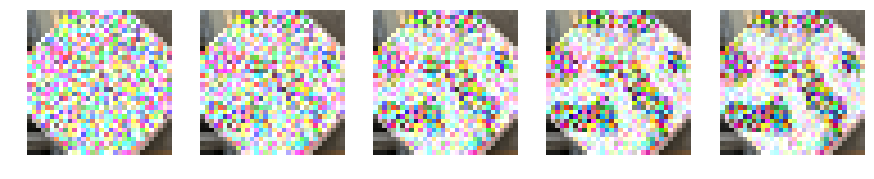

In [55]:
showImagesHorizontally(images[0:5])

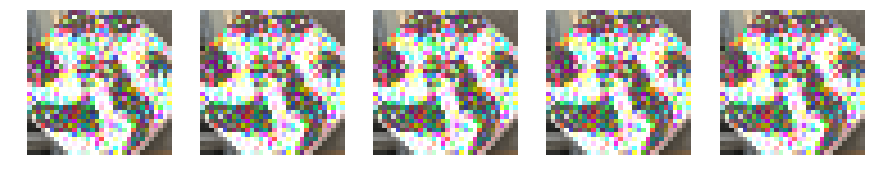

In [56]:
showImagesHorizontally(images[10:15])

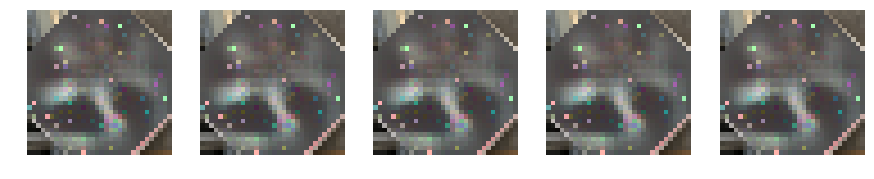

In [58]:
showImagesHorizontally(images[100:105])

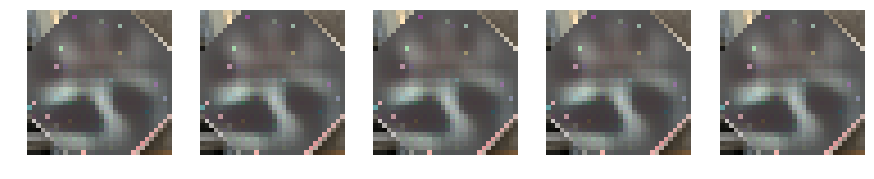

In [59]:
showImagesHorizontally(images[200:205])

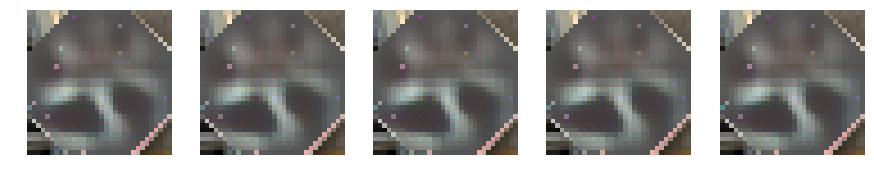

In [60]:
showImagesHorizontally(images[295:])

In [74]:
SIGN_PREFIX="noinversemask_second_trial_run"
SIGN_MASK="octagon.png"
EPOCH=299

!python apply_noise_to_bigger_image.py \
    --big_image ./misc/uw17-cropped.png \
    --model_path ./optimization_output/noinversemask_second_trial_run/model/noinversemask_second_trial_run-299 \
    --output_path ./misc/uw17-octagon-noise-npadd.png \
    --attack_mask ./masks/octagon.png

Using TensorFlow backend.
W1113 06:18:33.649070 140314169309056 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W1113 06:18:33.649535 140314169309056 module_wrapper.py:139] From /content/robust_physical_perturbations/lisa-cnn-attack/cleverhans/utils_tf.py:380: The name tf.GraphKeys is deprecated. Please use tf.compat.v1.GraphKeys instead.

Noise loaded from ./optimization_output/noinversemask_second_trial_run/model/noinversemask_second_trial_run-299
Mask ./masks/octagon.png
Source image ./misc/uw17-cropped.png
bimg shape (300, 300, 3)
W1113 06:18:33.941653 140314169309056 module_wrapper.py:139] From /content/robust_physical_perturbations/lisa-cnn-attack/ut

In [0]:
from IPython.display import Image, display_png

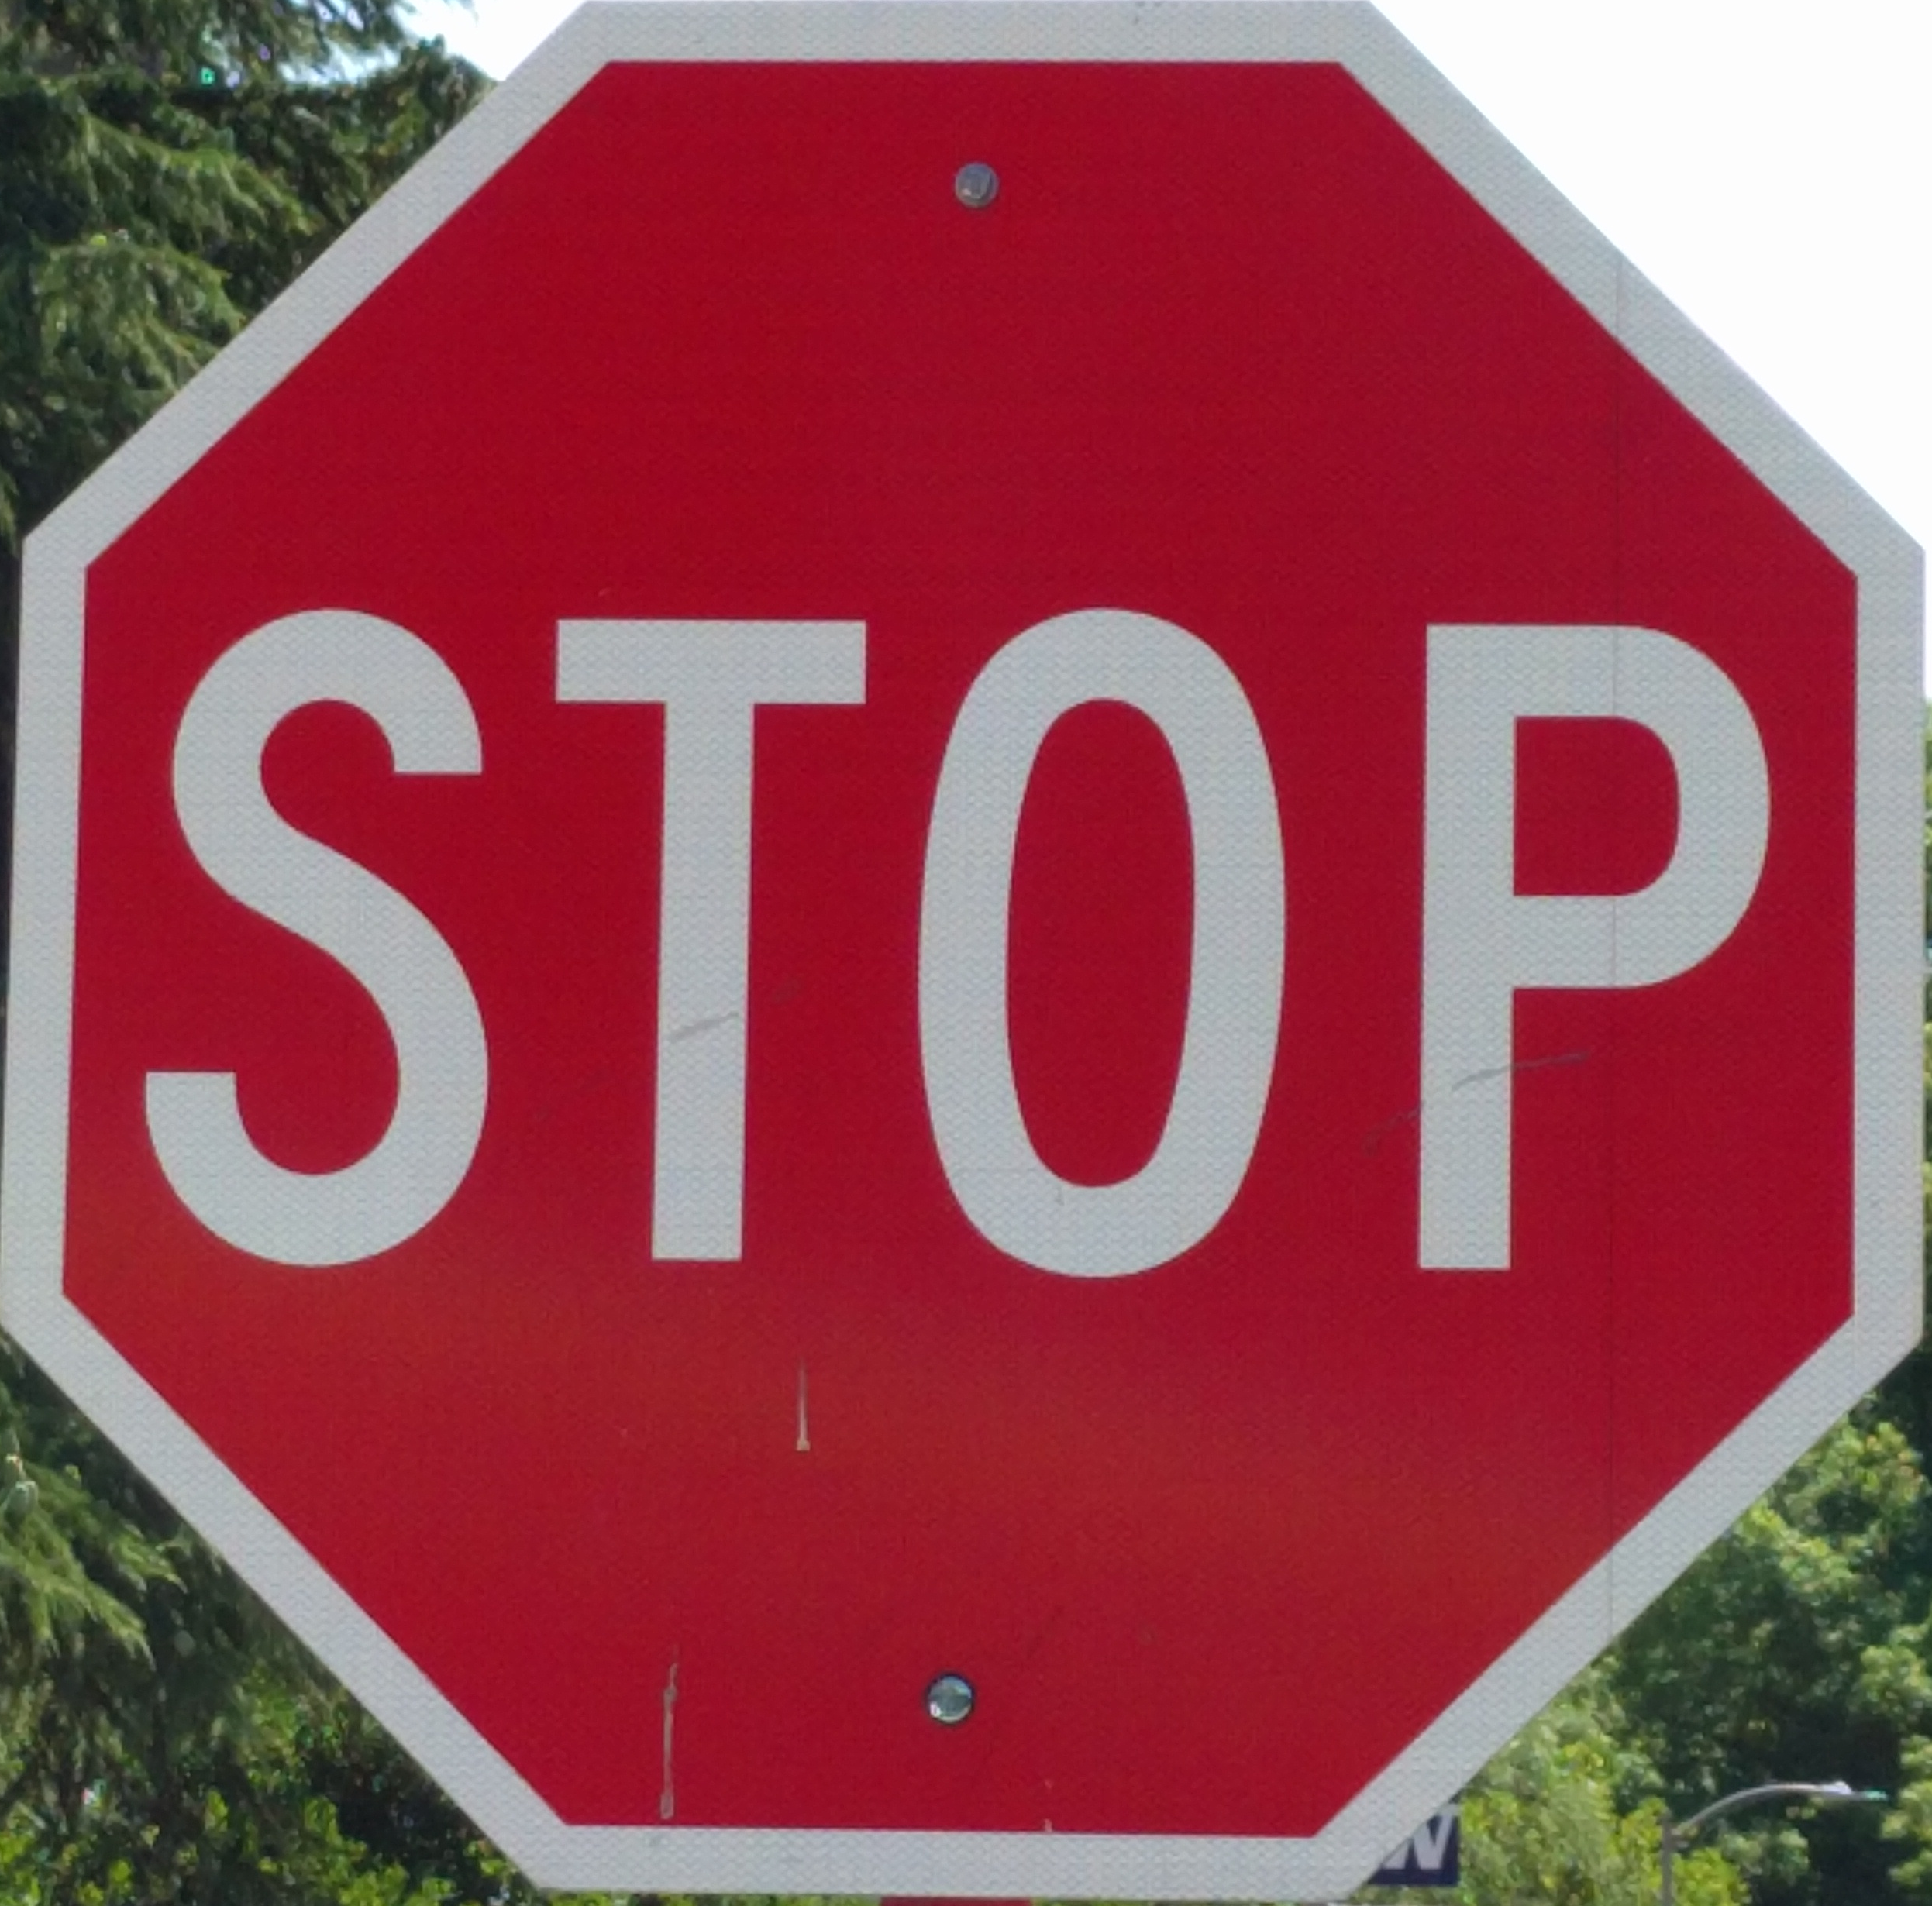

In [85]:
display_png(Image("./misc/uw17-cropped.png", width=300, height=300))

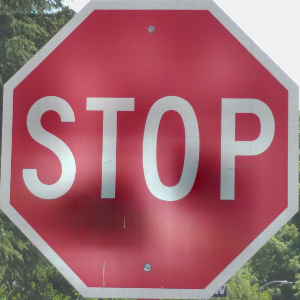

In [79]:
display_png(Image("./misc/uw17-octagon-noise-npadd.png"))